In [2]:
import pandas as pd
import numpy as np
import pyod
np.set_printoptions(precision=3)

In [3]:
import matplotlib.pyplot as plt
from pyod.models.knn import KNN

In [5]:
testing_set = pd.read_csv('instagram_testing_set.csv',sep=',',header=0)
training_set = pd.read_csv('instagram_training_set.csv',sep=',',header=0)

In [63]:
testingSet = testing_set.values
np.random.shuffle(testingSet)

testingSet = testingSet.astype(float)
            
y_test = testingSet[:, 11].astype(int)
#testingSet = np.delete(testingSet, 11, axis=1)

trainingSet = training_set.values
np.random.shuffle(trainingSet)

trainingSet = trainingSet.astype(float)
            
y_train = trainingSet[:, 11].astype(int)
#trainingSet = np.delete(trainingSet, 11, axis=1)

In [64]:
print(testingSet.shape)
print(np.sum(y_test)/testingSet.shape[0])

(120, 12)
0.5


In [100]:
from pyod.utils.data import generate_data
from pyod.models.abod import ABOD

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

clf_name = 'ABOD'
clf = ABOD(contamination = 0.1)
clf.fit(X_train)

/usr/local/lib/python3.7/dist-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


[[ 8.288  8.051]
 [ 8.8    8.835]
 [ 7.592  8.33 ]
 [ 7.971  8.344]
 [ 8.854  8.393]
 [ 7.76   7.925]
 [ 8.225  7.978]
 [ 7.713  8.072]
 [ 7.381  8.113]
 [ 8.581  8.375]
 [ 9.297  7.617]
 [ 8.907  7.746]
 [ 7.718  7.218]
 [ 8.861  7.466]
 [ 8.665  7.784]
 [ 7.614  7.98 ]
 [ 7.675  7.163]
 [ 7.923  7.024]
 [ 7.425  7.765]
 [ 8.487  7.63 ]
 [ 8.916  7.383]
 [ 7.803  7.343]
 [ 8.084  7.881]
 [ 7.673  9.126]
 [ 8.52   7.153]
 [ 8.05   8.255]
 [ 8.469  8.462]
 [ 8.398  7.878]
 [ 8.444  6.787]
 [ 8.535  8.199]
 [ 7.585  7.494]
 [ 8.482  7.32 ]
 [ 7.592  8.108]
 [ 8.673  7.566]
 [ 8.287  8.308]
 [ 8.364  8.524]
 [ 8.433  7.469]
 [ 7.76   8.38 ]
 [ 7.685  8.07 ]
 [ 8.532  8.813]
 [ 7.677  7.958]
 [ 7.916  7.213]
 [ 8.397  7.777]
 [ 7.689  7.001]
 [ 7.953  7.342]
 [ 8.105  7.412]
 [ 7.341  8.607]
 [ 8.863  7.577]
 [ 8.17   8.186]
 [ 8.317  8.079]
 [ 7.971  8.683]
 [ 7.982  8.685]
 [ 7.088  8.76 ]
 [ 8.454  8.389]
 [ 7.38   8.501]
 [ 7.755  8.041]
 [ 9.272  6.867]
 [ 7.886  7.772]
 [ 7.854  7.80

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [101]:
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [102]:
from pyod.utils.data import evaluate_print

print("\nOn Test Data:")
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

for i in range(y_test.size):
    if(y_test[i] == 1 and y_test_pred[i] == 1):
        truePositive = truePositive+1
    elif (y_test[i] == 0 and y_test_pred[i] == 0):
        trueNegative = trueNegative+1
    elif (y_test[i] == 0 and y_test_pred[i] == 1):
        falsePositive = falsePositive+1
    else:
        falseNegative = falseNegative+1

print(truePositive, " | ", falsePositive)
print(falseNegative, " | ", trueNegative,"\n")

evaluate_print(clf_name, y_test, y_test_scores)


On Test Data:
10  |  0
0  |  90 

ABOD ROC:1.0, precision @ rank n:1.0


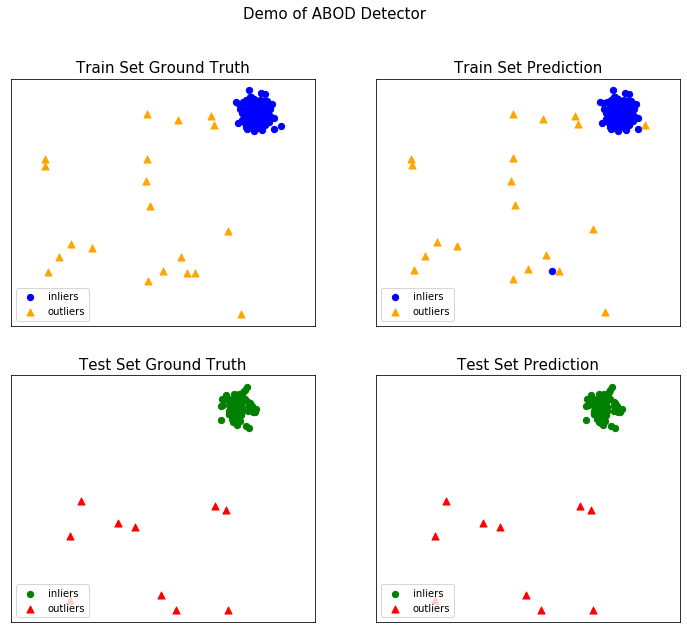

In [103]:
from pyod.utils.example import visualize

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)
